In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [10]:
# root = 학습/테스트 데이터가 저장되는 경로
# train = 학습용 데이터셋인지, 테스트용 데이터셋인지
# download = root에 데이터가 없는 경우 인터넷에서 다운로드
# transform = 특징(feature)과 정답(label) 변형(transform)을 지정

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

training_data[0][0].size()

torch.Size([1, 28, 28])

<function matplotlib.pyplot.show(close=None, block=None)>

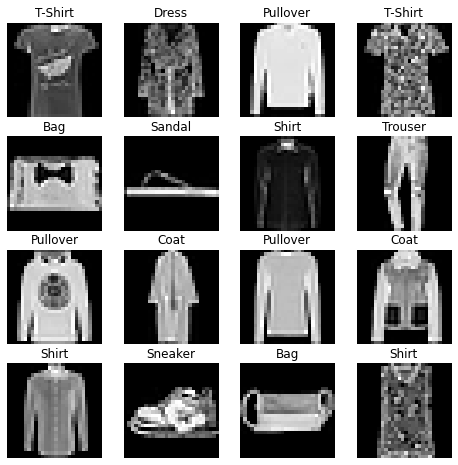

In [12]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 4, 4

for i in range (1, cols*rows + 1):
    # 최소 0(default), 최대 60,000(training_data의 크기) 사이의 정수
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show


In [5]:
# 사용자 정의 데이터셋 생성
import os
import pandas
from torchvision.io import read_image

In [13]:
class CustomImageDataset(Dataset):
    
    # 이미지와 주석 파일을 불러와서 초기화
    def __init__(self, annotations_file, img_dir, transfrom=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    # 데이터셋의 샘플 개수를 반환 (라벨의 개수 아님)
    def __len__(self):
        return len(self.img_labels)
    
    # 주어진 인덱스에 해당하는 샘플을 반환
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path) # 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [15]:
len(train_dataloader)

938

In [16]:
train_features, train_labels = next(iter(train_dataloader))
train_features.size()

torch.Size([64, 1, 28, 28])

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


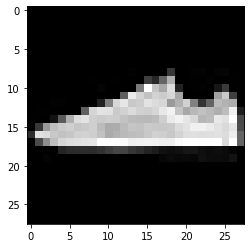

Label: 7


In [17]:
# 이미지와 정답(label)을 표시합니다.

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze()
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")